In [1]:
import pandas as pd

# 1. Load the CSV file
df = pd.read_csv('diseases.csv')

In [2]:
print(df.head())  # First 5 rows
print(df.info())  # Column data types and missing values
print(df.describe())  # Summary statistics for numeric columns


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

In [5]:
disease_counts = df['prognosis'].value_counts()
print(disease_counts)


Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [9]:
print(df.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)


In [10]:
print(df.columns.tolist())


['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier # our algorithm
from sklearn.model_selection import train_test_split # to split data into train and test
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


C:\Users\premp\AppData\Local\Temp\ipykernel_18808\4078816569.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Reds")


<Axes: >

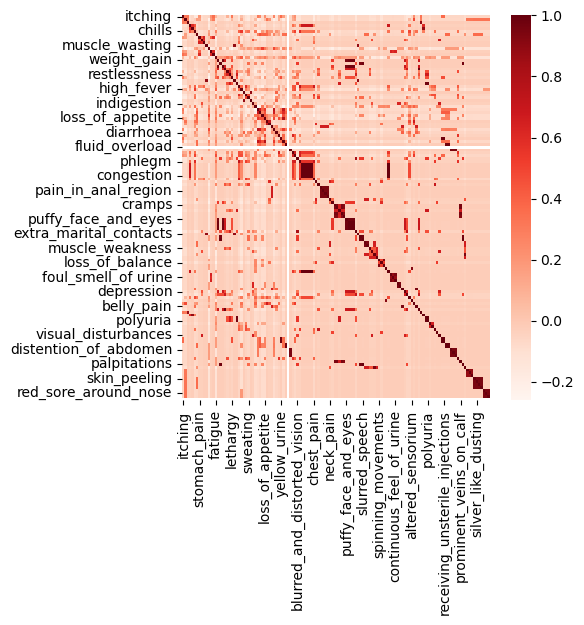

In [62]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap="Reds")

In [63]:
X = df.drop(['prognosis'], axis=1)
y = df[['prognosis']]

In [64]:
# Fill all NaN values with a specific value
df = df.fillna(0)  # or df.fillna('Unknown')

# Check the resulting DataFrame
print(df)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [65]:
X.shape

(4920, 133)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y[['prognosis']], random_state = 111, test_size = 0.2)

In [67]:
X_train.shape

(3936, 133)

In [68]:
from sklearn.model_selection import cross_val_score

def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "RandomForest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)

    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
RandomForest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


C:\Users\premp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


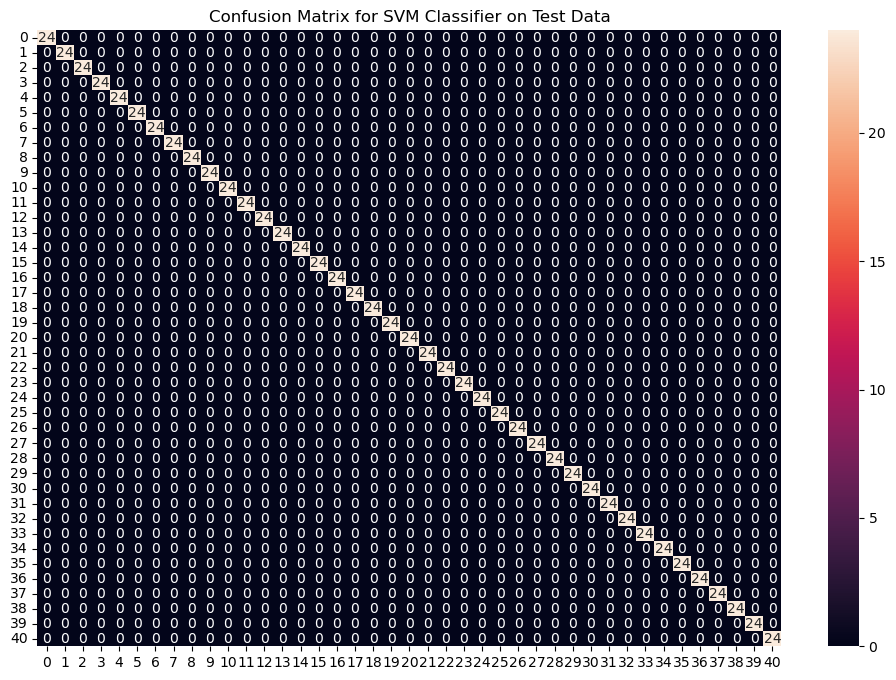

C:\Users\premp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


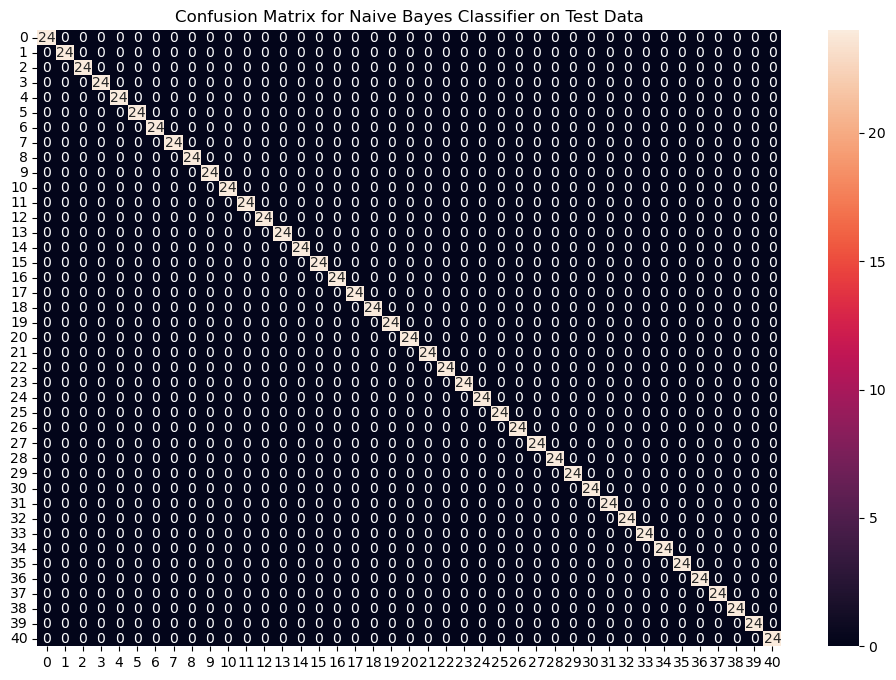

C:\Users\premp\AppData\Local\Temp\ipykernel_18808\590049791.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


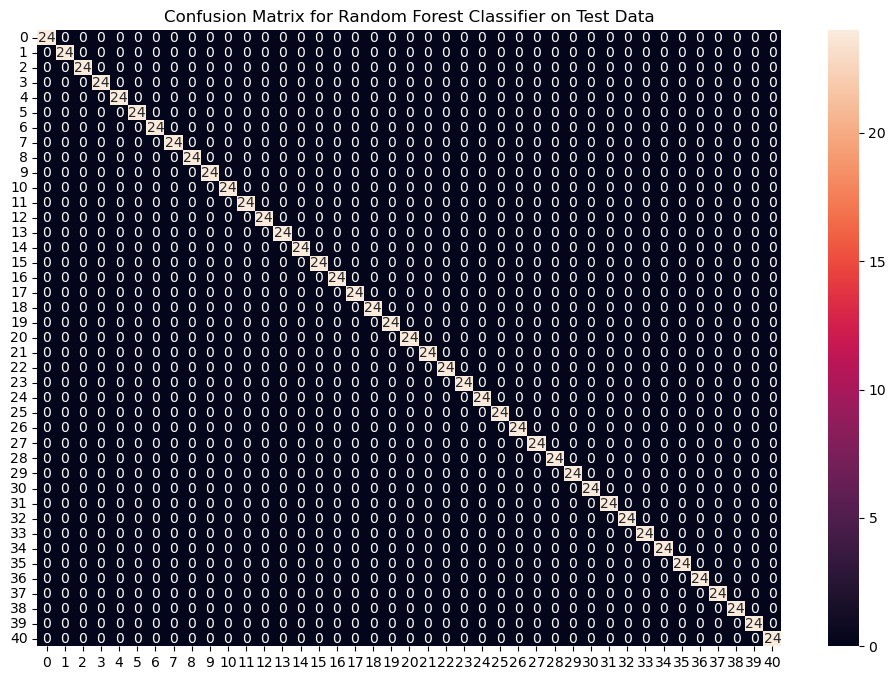

In [69]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


C:\Users\premp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
test_data = pd.read_csv("Testing.csv")
test_X = test_data.drop('prognosis', axis=1)
test_Y = encoder.transform(test_data.prognosis)

In [72]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1

C:\Users\premp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
X_test = X_test[X_train.columns]


In [74]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

C:\Users\premp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


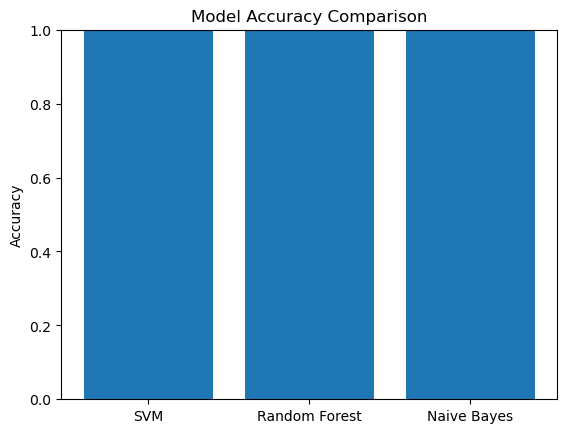

In [75]:
import numpy as np

models = ['SVM', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_score(y_train, svm_model.predict(X_train))*100,
              accuracy_score(y_test, y_pred_nb),
              accuracy_score(y_train, rf_model.predict(X_train))*100]

# Plotting
plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


In [76]:
print(X_train.columns)
print(X_test.columns)


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'Unnamed: 133'],
      dtype='object', length=133)
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'Unnamed: 133'],
      dtype='object', length=133)


In [78]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)


C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}


C:\Users\premp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [79]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. Feature 97 (0.019787395139034884)
2. Feature 6 (0.015785973101631864)
3. Feature 0 (0.015384464316415427)
4. Feature 98 (0.015086864523758854)
5. Feature 14 (0.014940100458049893)
6. Feature 19 (0.014413222163019455)
7. Feature 86 (0.014286030925550964)
8. Feature 43 (0.014278451472601513)
9. Feature 41 (0.014060787061026685)
10. Feature 63 (0.013965739038471488)
11. Feature 106 (0.013655078447431327)
12. Feature 56 (0.0136172184766453)
13. Feature 35 (0.013333270523463059)
14. Feature 28 (0.013092753795748795)
15. Feature 33 (0.01281473493297193)
16. Feature 25 (0.012804424718415959)
17. Feature 109 (0.012214036774442131)
18. Feature 91 (0.012168063794233575)
19. Feature 11 (0.011888104403705704)
20. Feature 107 (0.011854421263939617)
21. Feature 32 (0.011402070378520122)
22. Feature 34 (0.01133595062220317)
23. Feature 27 (0.011135498124844085)
24. Feature 114 (0.010992450823285885)
25. Feature 92 (0.010763361588050411)
26. Feature 108 (0.010673561355023025)
27. F

In [81]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']